# Step 01: Import Data and Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [2]:
# Load the dataset
df = pd.read_csv('transaction_anomalies_dataset.csv')
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


# Step 02: Check for Null Values, Column Info, and Descriptive Statistics

In [3]:
# Display column info
print("\nColumn information:")
df.info()


Column information:
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   str    
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   str    
 7   Time_of_Day                  1000 non-null   str    
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   str    
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   str    
dtypes: float64(2), int64(5), str(5)
memory usage: 93.9 KB


In [4]:
# Show descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive statistics:")
print(descriptive_stats)


Descriptive statistics:
       Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225               

# Step 03: Check Distribution of Transaction Amounts

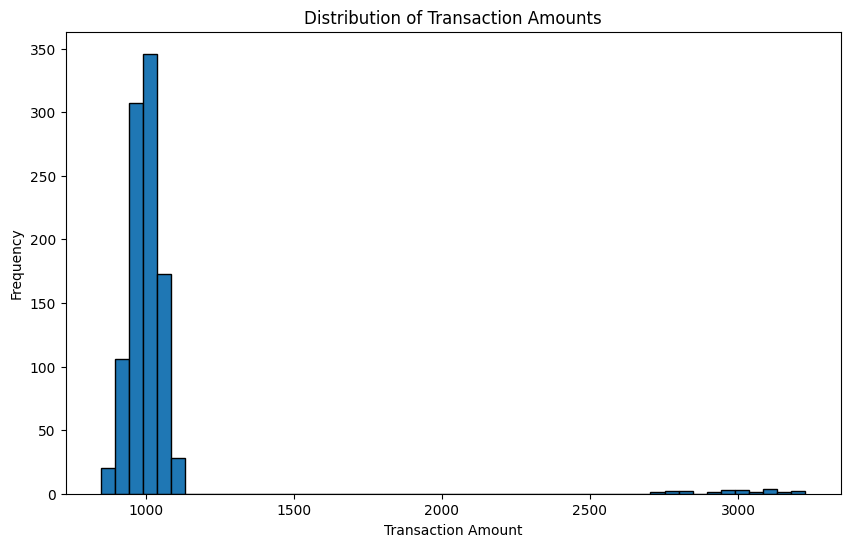

In [5]:
# Plot distribution of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(df['Transaction_Amount'], bins=50, edgecolor='k')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Step 04: Check Distribution of Transaction Amounts by Account Type

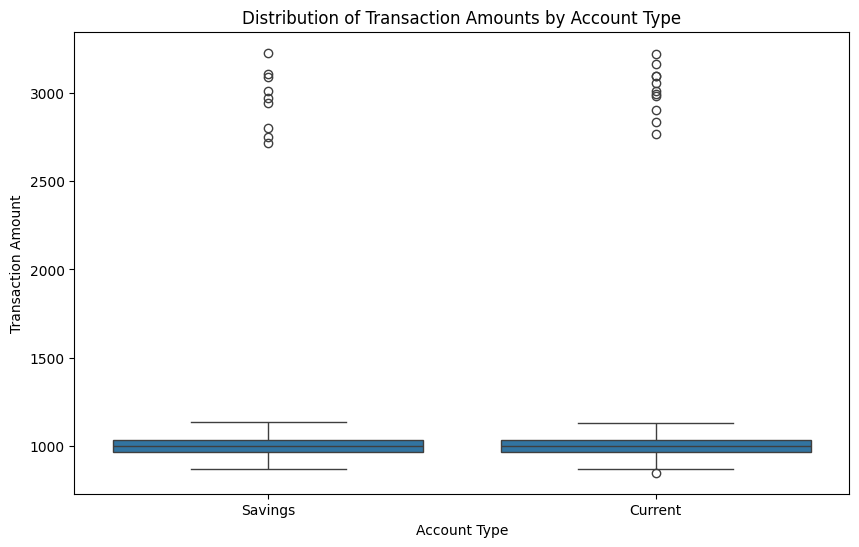

In [6]:
# Boxplot of transaction amounts by account type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=df)
plt.title('Distribution of Transaction Amounts by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.show()

# Step 05: Check Average Transaction Amount by Age

In [7]:
# Calculate average transaction amount by age
avg_transaction_by_age = df.groupby('Age')['Transaction_Amount'].mean().reset_index()

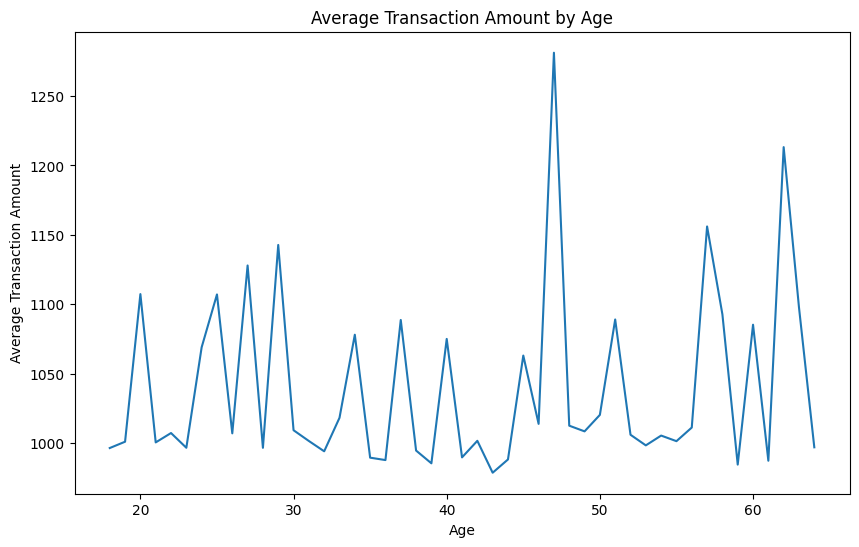

In [8]:
# Plot average transaction amount by age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Transaction_Amount', data=avg_transaction_by_age)
plt.title('Average Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.show()

# Step 06: Check the Count of Transactions by Day of the Week

In [9]:
# Count transactions by day of the week
transactions_by_day = df['Day_of_Week'].value_counts().sort_index()

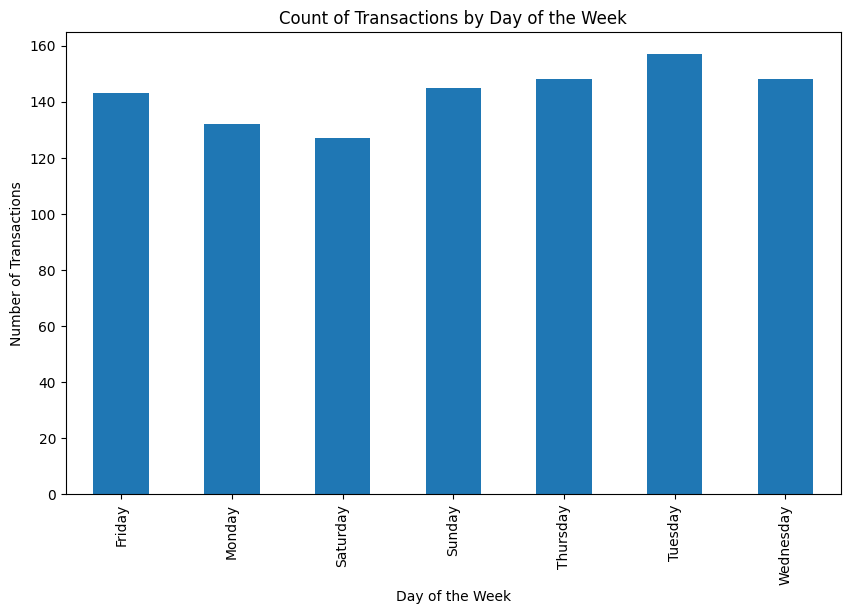

In [10]:
# Plot transactions by day of the week
plt.figure(figsize=(10, 6))
transactions_by_day.plot(kind='bar')
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

# Step 07: Check Correlation Between All Columns

In [11]:
# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [12]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

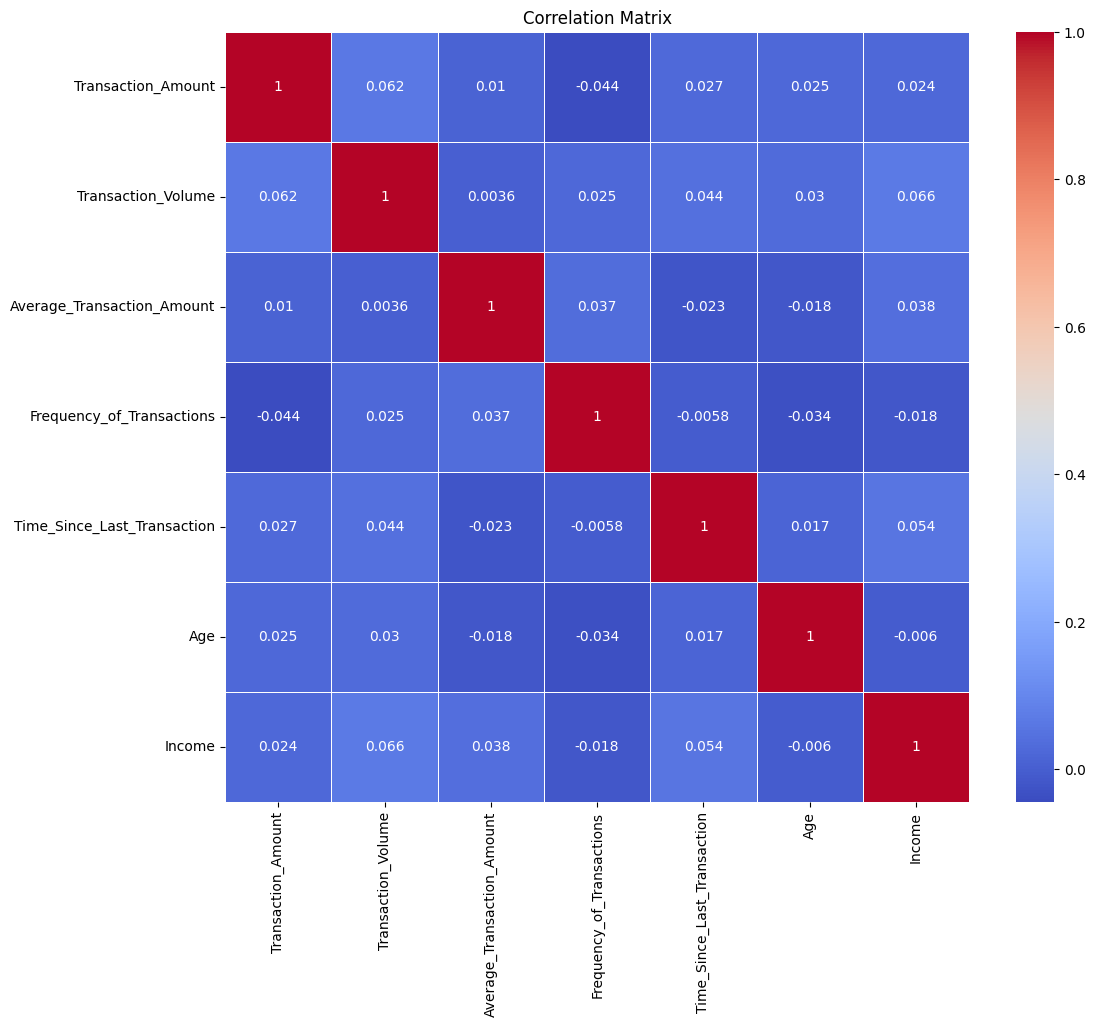

In [13]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Step 08: Calculate the Number of Anomalies in the Data

In [14]:
# Select relevant features for anomaly detection
features = df[['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 'Frequency_of_Transactions', 
               'Time_Since_Last_Transaction', 'Age', 'Income']]

In [15]:
# Handle missing values if any
features = features.fillna(features.mean())

In [16]:
# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = isolation_forest.fit_predict(features)

In [17]:
# Calculate the number of anomalies
num_anomalies = df['anomaly'].value_counts()[1]
total_transactions = len(df)
anomaly_ratio = num_anomalies / total_transactions

print(f"Number of anomalies: {num_anomalies}")
print(f"Total transactions: {total_transactions}")
print(f"Anomaly ratio: {anomaly_ratio}")

Number of anomalies: 900
Total transactions: 1000
Anomaly ratio: 0.9


# Step 09: Fit Isolation Forest Model for Anomaly Detection

In [18]:
# Predict anomalies using the trained Isolation Forest model
df['anomaly'] = isolation_forest.predict(features)

In [19]:
# Convert the prediction into binary values (1 for anomalies, 0 for normal)
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Step 10: Visualize Anomalies

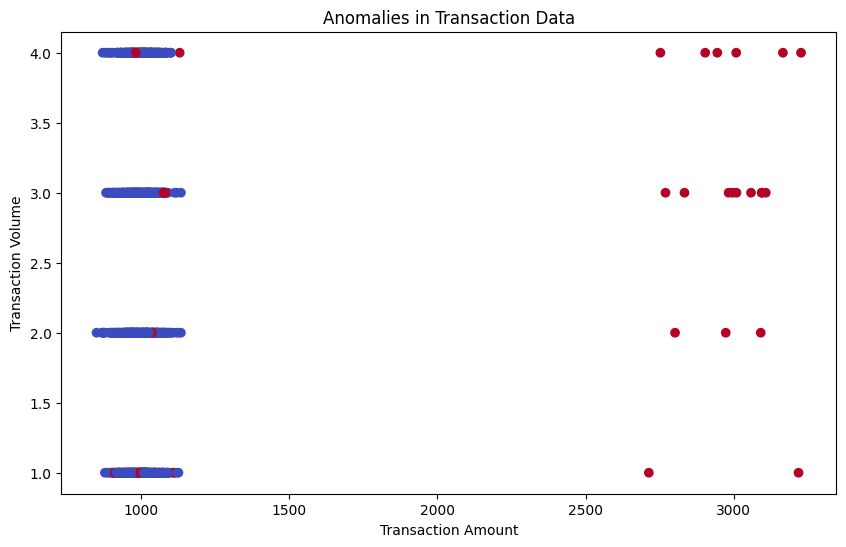

In [20]:
# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['Transaction_Amount'], df['Transaction_Volume'], c=df['anomaly'], cmap='coolwarm')
plt.title('Anomalies in Transaction Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Volume')
plt.show()

# Step 11: Show the Classification Report

In [21]:
# Generate classification report
report = classification_report(df['anomaly'], isolation_forest.predict(features))

print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     900.0
           1       0.00      0.00      0.00     100.0

    accuracy                           0.00    1000.0
   macro avg       0.00      0.00      0.00    1000.0
weighted avg       0.00      0.00      0.00    1000.0



C:\Users\MK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\MK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\MK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

# Step 12: Use the Trained Model for Anomaly Detection

In [22]:
# Use the trained model to detect anomalies within the same dataset

# Assuming 'df' and 'features' are already defined as per previous steps
# Predict anomalies on the same dataset (for demonstration purposes)
df['new_anomaly_prediction'] = isolation_forest.predict(features)
df['new_anomaly_prediction'] = df['new_anomaly_prediction'].apply(lambda x: 1 if x == -1 else 0)

# Check the new anomaly predictions
new_anomaly_count = df['new_anomaly_prediction'].sum()
total_transactions = len(df)
new_anomaly_ratio = new_anomaly_count / total_transactions

print(f"Number of new anomalies detected: {new_anomaly_count}")
print(f"Total transactions: {total_transactions}")
print(f"New anomaly ratio: {new_anomaly_ratio}")

Number of new anomalies detected: 100
Total transactions: 1000
New anomaly ratio: 0.1
